# Проект "Анализ результатов А/В теста"

Вместе с отделом маркетинга мы подготовили список гипотез. Наша цель - увеличение выручки. 

Для этого нам предстоит:
- приоритизировать гипотезы;
- запустить А/В-тест;
- проанализировать результаты. 

Нам предоставлены данные:

Файл с гипотезами и параметрами:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл с перечнем заказов:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл с перечнем пользователей:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## Приоритизация гипотез

Мы будем приоритизировать гипотезы методами ICE и RICE.

Первый метод рассчитывает оценку гипотезы по следующим компонентам: 
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

Метод RICE также учитывает такой компонент как охват:
- Reach — скольких пользователей затронет изменение, которое вы хотите внести.

Изучим содержимое датасета с гипотезами:

In [1]:
#импортирование библиотек

import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#вывод датасета с гипотезами

hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
pd.options.display.max_colwidth = 150
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
#приведение названий столбцов к нижнему регистру

hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head(5)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Нам предстоит приоритизировать 9 гипотез. 

Посчитаем ICE для них:

In [4]:
#приоритизация методом ICE

hypothesis['ICE']=round((hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'],2)
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективными являются гипотезы с индексом 8, 0 и 7. 

У первых двух низкий параметр Reach (1 и 3 балла), т.е. количество пользователей, которых она затронет, невелико. У гипотезы 7 другая ситуация - она затрагивает много пользователей (Reach = 10), однако стоимость теста гипотезы довольно большая (параметр Efforts = 5).  

Приоритизируем гипотезы методом RICE:

In [5]:
#приоритизация методом RICE

hypothesis['RICE']=(hypothesis['reach'] * hypothesis['impact'] \
                * hypothesis['confidence'])/hypothesis['efforts']

hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективной гипотезой стала гипотеза с индексом 7. Она затрагивает всех пользователей (Reach = 10), имеет сильное влияние на пользователей и их удовлетворение от продукта (Impact = 7), и высока уверенность, что изменение повлияет на пользователей именно так (Confidence = 8).

**Вывод:** При приоритизации методом ICE, на лидирующие позиции вышли следующие гипотезы:

- №8 Запустить акцию, дающую скидку на товар в день рождения
- №0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- №7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Гипотезы, лидирующие по приоритизации методом RICE:
- №7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок *(лидер с большим отрывом)*
- №2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- №0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Для тестирования следует предложить гипотезу №7 и №0.

## Подготовка данных

Выведем основную информацию о датасете с заказами:

In [6]:
#датасет с заказами

orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
#первые 5 строк

orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
#приведение названий столбцов к нижнему регистру

orders.columns = orders.columns.str.lower()

In [9]:
#проверка явных дубликатов

orders.duplicated().sum()

0

In [10]:
#проверка пропусков

orders.isna().sum()

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

Преобразуем тип данных в столбце с датой:

In [11]:
#преобразование типов данных

orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
#описание данных о дате

orders['date'].describe()

/tmp/ipykernel_138/1664553187.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders['date'].describe()


count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Представлены данные по заказам за август 2019 года, далее проверим период, за который представлены данные о визитах.

Проверим корректность данных - есть ли среди пользователей те, которые попали в обе тестовые группы.

In [13]:
#проверка попадания пользователей в обе группы

check = orders.pivot_table(index='visitorid', 
        columns='group',
        values='revenue',
        aggfunc='count')
check = check.dropna().reset_index() 
print('Пользователей в обеих группах:', check['visitorid'].nunique())
check.head()

Пользователей в обеих группах: 58


group,visitorid,A,B
0,8300375,1.0,1.0
1,199603092,4.0,1.0
2,232979603,1.0,1.0
3,237748145,4.0,1.0
4,276558944,1.0,1.0


Таких пользователей оказалось 58. Смысл теста заключается в том, что группы независимы друг от друга, а пересечение пользователей между группами искажают результаты теста. В целях чистоты теста, удалим дублирующихся пользователей из обеих групп. 

Преобразуем идентификаторы повторяющихся пользователей в список и удалим их из датасета с заказами:

In [14]:
#создаем список с id
checkid = list(check['visitorid'])

#сохраняем исходный датафрейм
original_orders = orders.copy()

#удаляем пользователей, попавших в обе группы
orders = orders.query('visitorid not in @checkid')

Выведем основную информацию о датасете с пользователями:

In [15]:
#датасет с пользователями

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
#первые 5 строк

visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [17]:
#проверка явных дубликатов

visitors.duplicated().sum()

0

In [18]:
#проверка пропусков

visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [19]:
#преобразование типов данных

visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [20]:
#описание данных о дате

visitors['date'].describe()

/tmp/ipykernel_138/2987738279.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visitors['date'].describe()


count                      62
unique                     31
top       2019-08-27 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [21]:
#сохраняем исходный датафрейм

original_visitors = visitors.copy()

Проверим сколько групп и посетителей в А/В тесте:

In [22]:
orders.pivot_table(columns='group', values='visitorid', aggfunc='nunique')

group,A,B
visitorid,445,528


Нам предоставлены данные по парному А/В тесту (две группы), в группе В на 83 посетителей больше, или 19%. Мы удалили одинаковое количество посетителей из обеих групп, поэтому на текущее количество это повлиять это не могло. Будем иметь ввиду, что группа В более многочислена.

Представлены данные по посещениям за август 2019 года, также, как и в предыдущем датасете.

## Анализ A/B-теста (графики)

### График кумулятивной выручки по группам

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(): 

In [23]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий (будто мы ежедневно считали результаты тестирования до выбранного дня включительно и сохраняли их в строках таблицы ordersAggregated):

In [24]:
# получаем агрегированные кумулятивные по дням данные о заказах 

ordersAggregated = datesGroups.apply(    
    lambda x: orders[np.logical_and(orders['date'] 
    <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', \
    'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1)\
    .sort_values(by=['date','group']) 

Аналогично получим агрегированные кумулятивные по дням данные о посетителях: 

In [25]:
# получаем агрегированные кумулятивные по дням данные о посетителях

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] \
    <= x['date'], visitors['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}),\
    axis=1).sort_values(by=['date','group']) 

Объединим обе таблицы: 

In [26]:
# объединяем кумулятивные данные в одной таблице 

cumulativeData = ordersAggregated.merge(visitorsAggregated, \
                 left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', \
                          'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

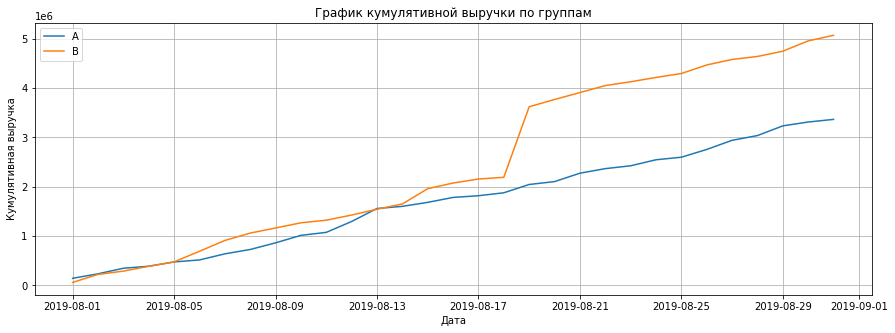

In [27]:
plt.figure(figsize=(15,5))

# датафрейм с кумулятивным количеством заказов 
# и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A']\
                     [['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов
# и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B']\
                     [['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста, однако в группе В наблюдается сильной скачок выручки 19 августа, это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Выведем топ-5 заказов по выручке 19 августа:

In [28]:
orders.query('date == "2019-08-19" ').\
sort_values(by='revenue', ascending=False).head()

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B


Действительно, 19 августа был один крупный заказ на сумму 1295 тыс., что является выбросом и следует учитывать в дальнейшем.

### График кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

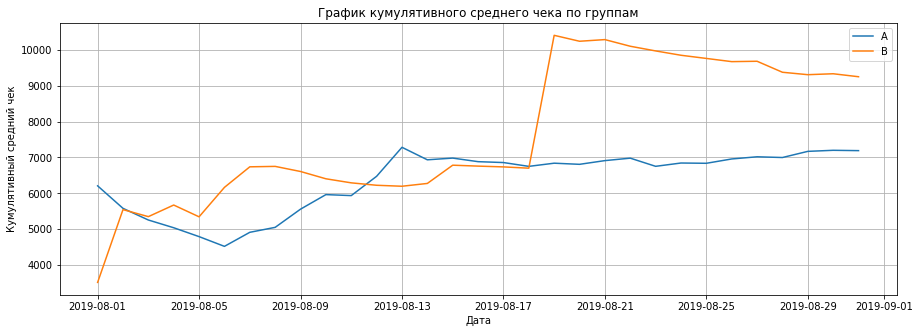

In [29]:
plt.figure(figsize=(15,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/\
         cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/\
         cumulativeRevenueB['orders'], label='B')

plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend();

Кумулятивный средний чек группы А падает с начала теста до 6 августа, начинает расти, достигает пика 13 августа и далее сохраняется на том же уровне. Кумулятивный средний чек группы В резко вырастает в начал теста, имеет небольшие скачки и падения, резко вырастает 19 августа, но к концу теста снижается, что означает, что далее всплесков не было. 

### График относительного изменения кумулятивного среднего чека

Построим график относительного различия для среднего чека. 

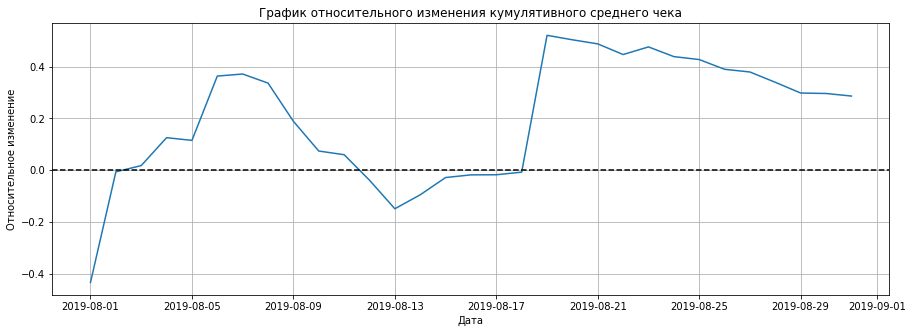

In [30]:
plt.figure(figsize=(15,5))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, \
                          left_on='date', right_on='date', how='left', \
                          suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], \
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/\
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение');

Средний чек группы В превышал средний чек группы В со 2 по 12 августа и с 19 августа до конца теста. 

### График кумулятивного среднего количества заказов на посетителя по группам (график кумулятивной конверсии)

Аналогично проанализируем график среднего количества заказов на посетителя. 

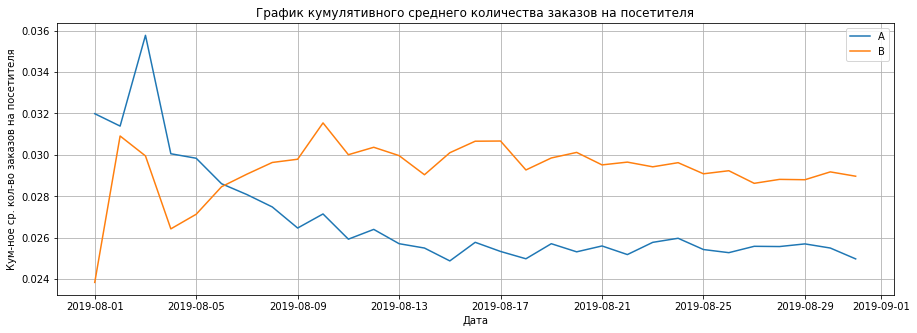

In [31]:
plt.figure(figsize=(15,5))

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/\
                                cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Кум-ное ср. кол-во заказов на посетителя')
plt.legend();

Кумулятивное среднее количество заказов на посетителя у обоих групп имеет скачок первые 2-3 дня, но кривая группы А стремительно падает и к 10 августа фиксируется около 0.025, а кривая группы В растет с 4 по 10 августа и фиксируется около 0.029, что означает, что в целом кумулятивное среднее количество заказов на посетителя группы В выше.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А:

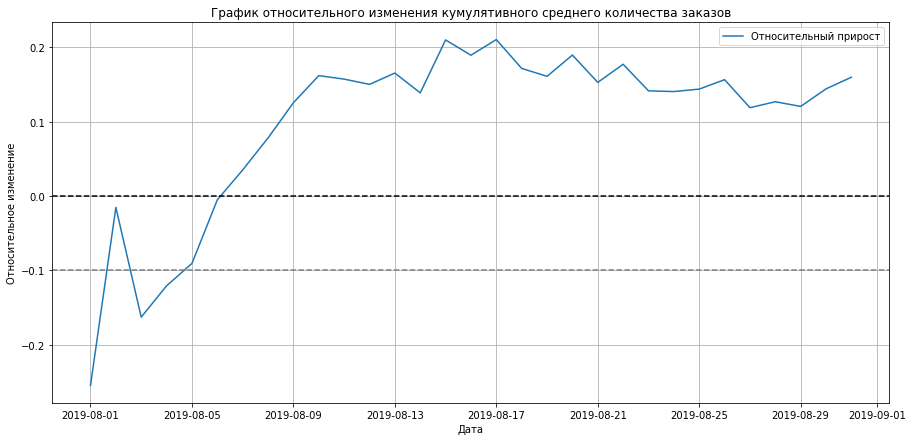

In [32]:
plt.figure(figsize=(15,7))

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].\
                            merge(cumulativeDataB[['date','conversion']],\
                            left_on='date', right_on='date', how='left', \
                            suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.grid()
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('График относительного изменения кумулятивного среднего количества заказов');

В начале теста группа B значительно проигрывала группе A, даже несмотря на скачок 2 августа, но 6 августа вырвалась вперёд и установилась до конца теста.  

### Точечный график количества заказов по пользователям

Изучим аномалии в данных, начнем с количества заказов по пользователям:

In [33]:
#группировка по пользователям и количествам заказов
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['visitorid', 'orders']

ordersByUsers.pivot_table(      
        columns='orders',
        values='visitorid',
        aggfunc='count')

orders,1,2,3
visitorid,937,29,7


7 пользователей сделали по три заказа, далее количество заказов на пользователя уменьшается. Построим гистрограмму распределения количества заказов на одного пользователя.

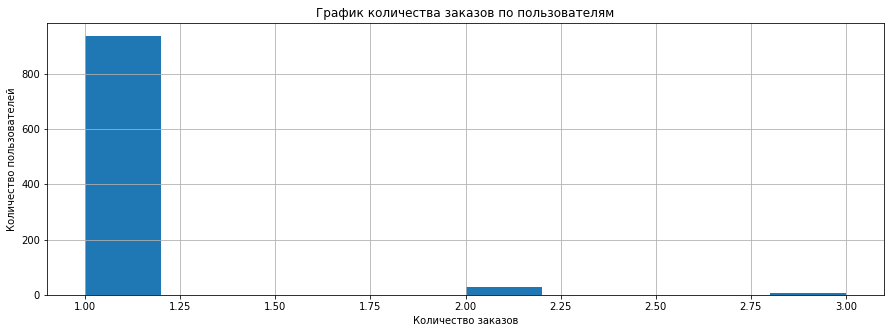

In [34]:
plt.figure(figsize=(15,5))
plt.hist(ordersByUsers['orders'])
plt.grid()
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.title('График количества заказов по пользователям');

Большинство пользователей делали по одному заказу. Построим точечную диаграмму числа заказов на одного пользователя:

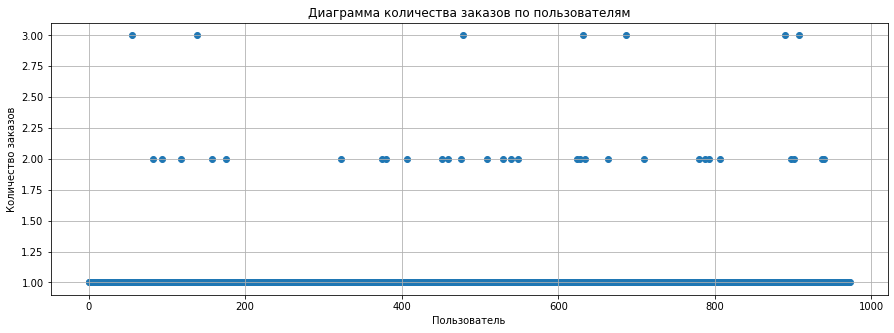

In [35]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.grid()
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')
plt.title('Диаграмма количества заказов по пользователям');

Пользователи не так часто делали по два заказа, а по три - совсем редко. Для определения границы аномальных пользователей посчитаем перцентили:

### Выберите границу для определения аномальных пользователей

In [36]:
o_percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
o_percentiles

array([1., 2.])

Не более 5% пользователей оформляли больше чем один заказ, и не более 1% - больше двух. Определим аномальными пользователей, сделавших более двух заказов.

In [37]:
orders_limit = o_percentiles[1]

### Точечный график стоимостей заказов

Продолжим изучать аномалии, простроив график стоимостей заказов:

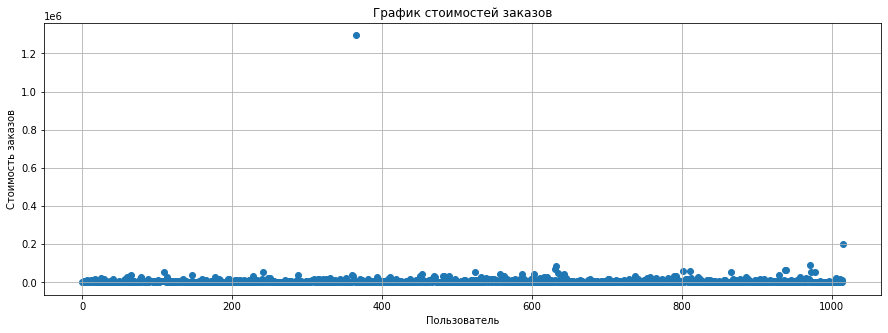

In [38]:
plt.figure(figsize=(15,5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.xlabel('Пользователь')
plt.ylabel('Стоимость заказов')
plt.title('График стоимостей заказов');

Судя по графику, есть два заказа с аномальной стоимостью (около 200 тыс. и свыше 1200 тыс.). Исключим заказы свыше 200 тыс и построим график для наглядности распределения:

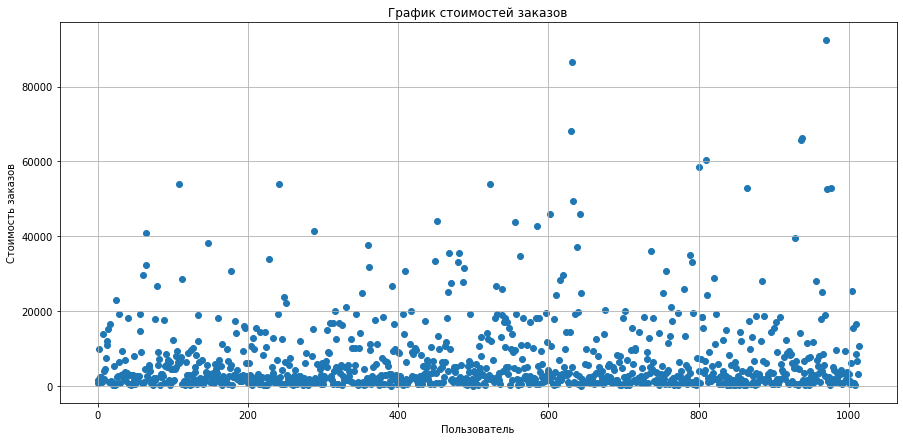

In [39]:
orders_normal = orders.query('revenue<200000')
plt.figure(figsize=(15,7))
x_values = pd.Series(range(0,len(orders_normal['revenue'])))
plt.scatter(x_values, orders_normal['revenue'])
plt.grid()
plt.xlabel('Пользователь')
plt.ylabel('Стоимость заказов')
plt.title('График стоимостей заказов');

Покупки распределены нормально, свыше 100 тыс. аномальных покупок нет. Для определения границы аномальной стоимости посчитаем перцентили:

### Выберите границу для определения аномальных заказов

In [40]:
r_percentiles = np.percentile(orders['revenue'], [95, 99])
r_percentiles

array([26785., 53904.])

Не более 5% заказов дороже 27 тыс. рублей и не более 1% заказов на сумму свыше 54 тыс. рублей.  Опеределим аномальные заказы стоимостью свыше 99 перцентиля или 53 904 руб.:

In [41]:
revenue_limit = r_percentiles[1]

## Расчет статистических значимостей

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами (по "сырым" данным)

Сделаем расчёт по "сырым" данным - без удаления аномальных пользователей. Выборка не распределена нормально, в ней присутствуют выбросы, и чтобы их влияние на результат теста не было сильным, как например при использовании алгебраических метрик, используем непараметрический тест Уилкоксона-Манна-Уитни. 

Сформулируем гипотезы:
- Нулевая: статистически значимых различий в среднем количестве заказов на посетителя между группами нет.
- Альтернативная: статистически значимые различия в среднем количестве заказов на посетителя между группами есть.

Сгруппируем данные по дате и количеству пользователей в каждой группе:

In [42]:
visitorsPerDate = visitors.pivot_table(index='date', columns='group', values='visitors', aggfunc='sum')

visitorsPerDate.columns = ['visitorsPerDateA', 'visitorsPerDateB']
visitorsPerDate.head()

,visitorsPerDateA,visitorsPerDateB
date,,
2019-08-01,719,713
2019-08-02,619,581
2019-08-03,507,509
2019-08-04,717,770
2019-08-05,756,707


Создадим переменные ordersByUsersA и ordersByUsersB, в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [43]:
#создадим переменные ordersByUsersA и ordersByUsersB

ordersByUsersA = (
    original_orders[original_orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'transactions']

ordersByUsersB = (
    original_orders[original_orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'transactions'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 

In [44]:
#объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов

sampleA = pd.concat(
    [ordersByUsersA['transactions'],
        pd.Series(0,index=np.arange(
                visitorsPerDate['visitorsPerDateA'].sum() - len(ordersByUsersA['transactions'])),
                  name='transactions',),], axis=0,)

sampleB = pd.concat(
    [ordersByUsersB['transactions'],
        pd.Series(0,index=np.arange(
                visitorsPerDate['visitorsPerDateB'].sum() - len(ordersByUsersB['transactions'])),
            name='transactions',),],axis=0,)

#применим статистический критерий Манна-Уитни к полученным выборкам:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов на посетителя между группами нет, отвергаем, т.е. в среднем числе заказов на посетителя между группами различия есть. Относительный выигрыш группы B равен 13.8%.

### Cтатистическая значимость различий в среднем чеке заказа между группами (по "сырым" данным)

Чтобы рассчитать статистическую значимость различий в среднем чеке по "сырым" данным, передадим критерию mannwhitneyu() данные о выручке с заказов и найдём относительные различия в среднем чеке между группами.

In [45]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(original_orders[original_orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/\
                       orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.844
Относительный показатель 'B' и 'A' = 0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет, т.е. средние чеки по "сырым" данным схожи. Впрочем, средний чек группы B значительно выше среднего чека группы A - на 29%.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами (по «очищенным» данным)

Для начала очистим данные от аномалий. За аномалии в п.3.7 и п.3.8 мы приняли пользователей, сделавших больше двух заказов, и заказы стоимостью свыше 99 перцентиля: 

In [46]:
#cрез пользователей с числом заказов больше 95 перцентиля
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['transactions'] > orders_limit]['visitorid'],
      ordersByUsersB[ordersByUsersB['transactions'] > orders_limit]['visitorid']],
    axis=0)

#cрез пользователей, совершивших заказы свыше 99 перцентиля
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_limit]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

abnormalUsers.head(5)

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorid, dtype: int64


Узнаем, сколько всего аномальных пользователей атрибутом shape:

In [47]:
print('Количество аномальных пользователей:', abnormalUsers.shape[0])
print('Относительная потеря составит:', round(abnormalUsers.shape[0]/orders['visitorid'].nunique(),2))

Количество аномальных пользователей: 29
Относительная потеря составит: 0.03


Всего 29 аномальных пользователей или 3%. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 

Сформулируем гипотезы:

- Нулевая: статистически значимых различий в среднем количестве заказов на посетителя между группами нет.
- Альтернативная: статистически значимые различия в среднем количестве заказов на посетителя между группами есть.

In [48]:
#объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов

sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['transactions'],
        pd.Series(0,index=np.arange(
            visitorsPerDate['visitorsPerDateA'].sum() - len(ordersByUsersA['transactions'])),
            name='transactions',),],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['transactions'],
        pd.Series(0,index=np.arange(
             visitorsPerDate['visitorsPerDateB'].sum() - len(ordersByUsersB['transactions'])),
            name='transactions',),],axis=0)

#применим статистический критерий Манна-Уитни к полученным выборкам
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.010
Относительный показатель 'B' и 'A' = 0.174


P-value = 0.01 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов на посетителя между группами нет, отвергаем, т.е. статистически значимые различия в среднем количестве заказов на посетителя между группами есть. Относительный выигрыш группы B вырос и теперь равен 17.4%.

### Cтатистическая значимость различий в среднем чеке заказа между группами (по «очищенным» данным)

In [49]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', 
                np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
                orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() / orders[
                np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()- 1))

p-value = 0.788
Относительный показатель 'B' и 'A' = -0.032


P-value снизился и разница между группами стала обратной: выигрыш группы А стал равен 3% из-за аномально крупного заказа, исключенного ранее.

## Решение по результатам теста

- Статистически значимые различия в среднем числе заказов на посетителя между группами есть и относительный выигрыш группы B по "сырым" данным равен 13.8%, по "очищенным" данным - 17.4%.
- Cтатистически значимых различий в среднем чеке между группами нет, но средний чек группы В по "сырым" данным выше на 29%, а по "очищенным" средний чек группы А выше на 3%.

статистически значимые различия в среднем количестве заказов на посетителя между группами есть


Исходя из обнаруженных фактов, тест следует остановить и признать победу группы В.